In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/home/ubuntu/ookla-statcan-analysis-neutron-1/data/Final.csv")

/tmp/ipykernel_3540475/2576861481.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/home/ubuntu/ookla-statcan-analysis-neutron-1/data/Final.csv")


In [3]:
#View of the dataset
data.head()

,Unnamed: 0,quadkey,avg_d_kbps,avg_u_kbps,year,PRNAME,CDNAME,CDTYPE,CSDNAME,CSDTYPE,...,SACTYPE,das_area,tile_area,tile_frac,das_frac,DAPOP,POP_DENSITY,PCNAME,PCTYPE,PCCLASS
0,35230,302231302213222,86968.308824,14096.147059,[2019],Ontario,Halton,RM,Halton Hills,T,...,1,4.489387e+06,205331.876525,0.917314,0.041955,1420,316.301553,Acton,2.0,2.0
1,18541,302231302213223,148950.375000,108518.000000,[2019],Ontario,Halton,RM,Halton Hills,T,...,1,2.309252e+07,205331.876525,0.475620,0.004229,470,20.352909,Acton,2.0,2.0
2,75590,302231302230013,106212.166667,76710.666667,[2019],Ontario,Halton,RM,Halton Hills,T,...,1,5.391016e+06,205402.379648,0.894827,0.034094,1030,191.058601,Acton,2.0,2.0
3,279031,302231302230022,8720.000000,934.000000,[2019],Ontario,Halton,RM,Halton Hills,T,...,1,1.030375e+07,205472.906899,0.611219,0.012189,505,49.011263,Acton,2.0,2.0
4,41645,302231302230023,14591.963768,1794.289855,[2019],Ontario,Halton,RM,Halton Hills,T,...,1,1.765704e+06,205472.906900,0.871430,0.101407,795,450.245236,Acton,2.0,2.0


In [4]:
# Show the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300074 entries, 0 to 300073
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   300074 non-null  int64  
 1   quadkey      300074 non-null  int64  
 2   avg_d_kbps   300074 non-null  float64
 3   avg_u_kbps   300074 non-null  float64
 4   year         300074 non-null  object 
 5   PRNAME       300074 non-null  object 
 6   CDNAME       300074 non-null  object 
 7   CDTYPE       300074 non-null  object 
 8   CSDNAME      300074 non-null  object 
 9   CSDTYPE      300074 non-null  object 
 10  ERNAME       300074 non-null  object 
 11  SACTYPE      300074 non-null  int64  
 12  das_area     300074 non-null  float64
 13  tile_area    300074 non-null  float64
 14  tile_frac    300074 non-null  float64
 15  das_frac     300074 non-null  float64
 16  DAPOP        300074 non-null  int64  
 17  POP_DENSITY  300074 non-null  float64
 18  PCNAME       102922 non-

In [5]:
# Drop the Unnamed column
data = data.drop(['Unnamed: 0'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300074 entries, 0 to 300073
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   quadkey      300074 non-null  int64  
 1   avg_d_kbps   300074 non-null  float64
 2   avg_u_kbps   300074 non-null  float64
 3   year         300074 non-null  object 
 4   PRNAME       300074 non-null  object 
 5   CDNAME       300074 non-null  object 
 6   CDTYPE       300074 non-null  object 
 7   CSDNAME      300074 non-null  object 
 8   CSDTYPE      300074 non-null  object 
 9   ERNAME       300074 non-null  object 
 10  SACTYPE      300074 non-null  int64  
 11  das_area     300074 non-null  float64
 12  tile_area    300074 non-null  float64
 13  tile_frac    300074 non-null  float64
 14  das_frac     300074 non-null  float64
 15  DAPOP        300074 non-null  int64  
 16  POP_DENSITY  300074 non-null  float64
 17  PCNAME       102922 non-null  object 
 18  PCTYPE       102922 non-

In [6]:
data['year'].unique()

array(['[2019]'], dtype=object)

### Data Visualization

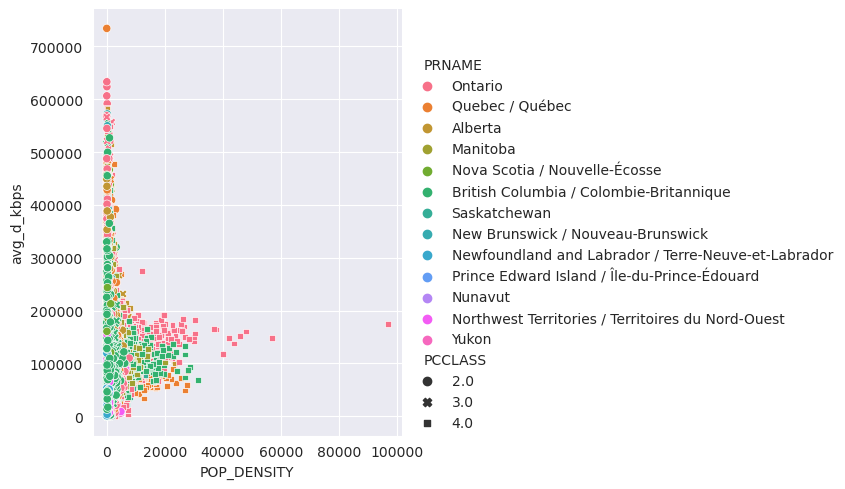

In [17]:
sns.relplot(data=data, x="POP_DENSITY", y="avg_d_kbps", hue="PRNAME", style="PCCLASS")

<Axes: xlabel='DAPOP', ylabel='avg_d_kbps'>

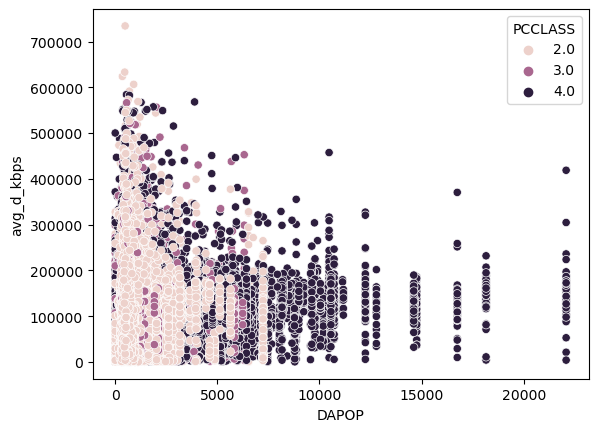

In [8]:
sns.scatterplot(data=data, x="DAPOP", y="avg_d_kbps", hue="PCCLASS")


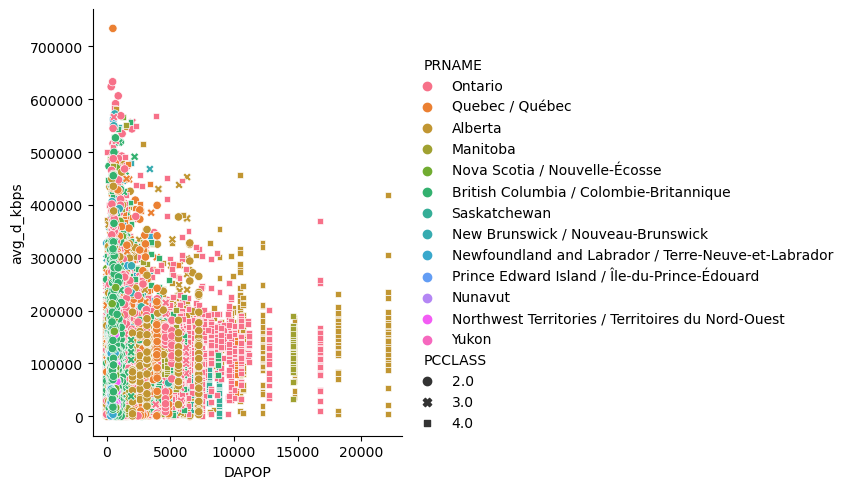

In [9]:
sns.relplot(data=data, x="DAPOP", y="avg_d_kbps", hue= "PRNAME", style="PCCLASS")

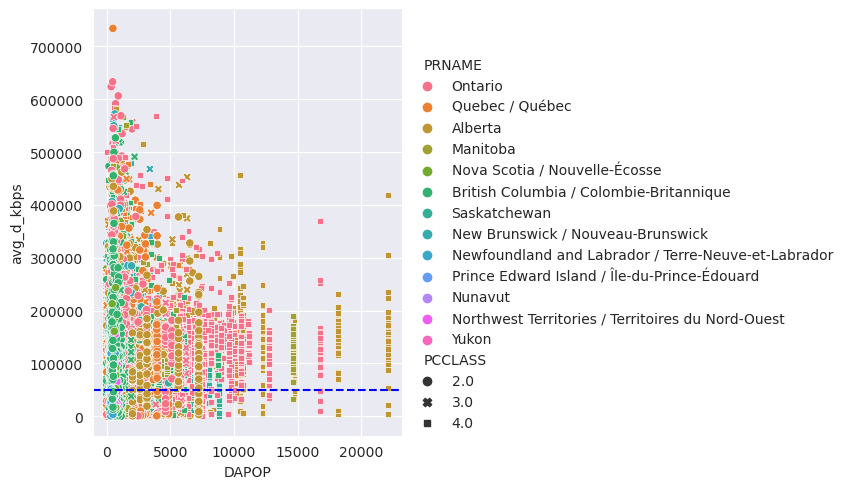

In [10]:
sns.set_style("darkgrid")
plot = sns.relplot(data=data, x="DAPOP", y="avg_d_kbps", hue="PRNAME", style="PCCLASS")
plot.ax.axhline(y=50000, color='b', linestyle='--')
plt.show()

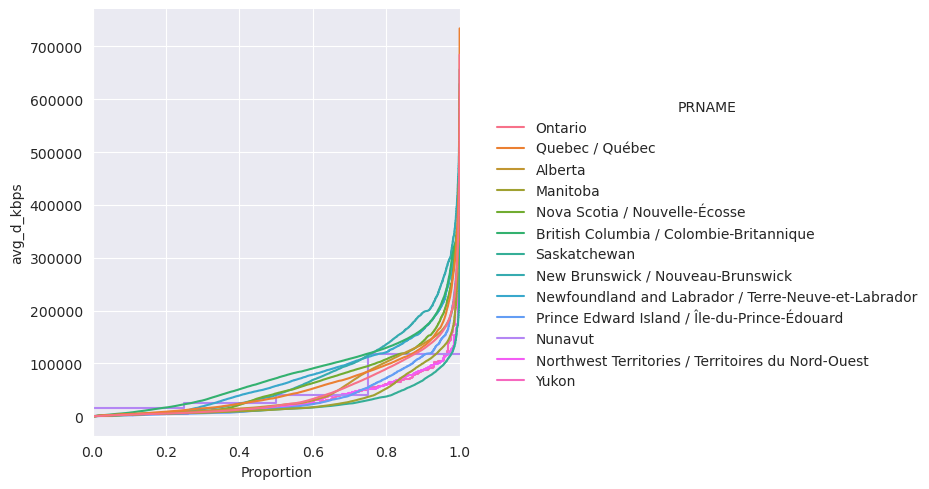

In [13]:
sns.displot(data=data, y="avg_d_kbps", hue= "PRNAME", kind="ecdf")

<Axes: ylabel='avg_d_kbps'>

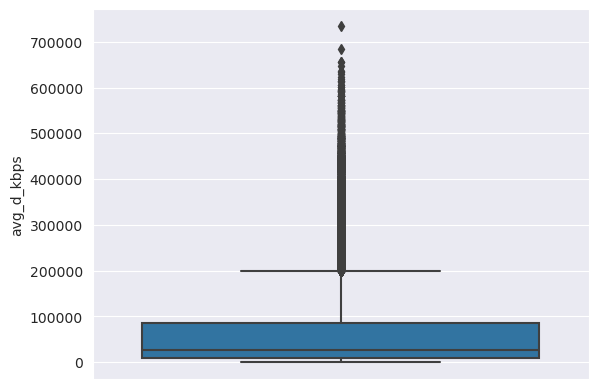

In [ ]:
sns.boxplot(data=data, y="avg_d_kbps")

In [ ]:
provinces = data['PRNAME'].unique().tolist()
for province in provinces:
    data = data.loc[data['PRNAME'] == province].iloc[0, 1:].tolist()

AttributeError: 'list' object has no attribute 'loc'